In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def neighbor(L,num):

  right = num+1
  if right % L == 0:
    right -= L

  left = num-1
  if (left+1) % L == 0:
    left += L

  up = num - L
  if up < 0:
    up += L*L

  down = num + L
  if down >= L*L:
    down -= L*L

  return np.array([right,up,left,down])

def neighbor_E(arr, L, num):
  return -np.sum(arr[neighbor(L,num)])*arr[num]

#"2차원 스핀계의 에너지_박치현"파일에서 확인한 코드를 함수로 만들었다
def energy(S):
  L=int(np.sqrt(len(S)))
  E=0
  for num in range(len(S)):
    E += (neighbor_E(S, L, num))
  return E/2

In [3]:
#1또는 -1가 무작위로 채워진 5x5 행렬(행렬 S)
L=5
random_arr = np.random.randn(L*L)
S = random_arr/abs(random_arr)
print(S)

#행렬 S의 총 에너지를 계산
E_S = energy(S)
print(E_S)

[ 1. -1. -1. -1. -1. -1.  1. -1. -1.  1. -1. -1.  1.  1.  1. -1.  1. -1.
  1.  1.  1. -1. -1.  1. -1.]
6.0


In [4]:
#행렬에서 하나의 값만 뒤집음(행렬 U)
U = S.copy()
number = np.random.choice(len(S)) #어떤 위치를 뒤집을지는 랜덤으로 선택한다
U[number] *= -1
print(U,number,'번째 flip')

#하나의 값을 뒤집은 행렬의 에너지를 다시 계산
E_U = energy(U)
print(E_U)

[ 1. -1. -1. -1. -1. -1.  1.  1. -1.  1. -1. -1.  1.  1.  1. -1.  1. -1.
  1.  1.  1. -1. -1.  1. -1.] 7 번째 flip
6.0


In [5]:
beta=1

#만약 다시 계산한 에너지(U)가 이전에 계산한 에너지(S)보다 작다면, 기존 행렬(S)를 (100%확률로) 값을 뒤집은 행렬(U)로 변경
if E_S > E_U:
  accept_S_to_U = 1

#이전에 계산한 에너지(S)보다 크다면, "확률적"으로 값을 뒤집은 행렬(U)로 변경
#이때, 이 "확률"은 베타(주로 0<beta<1)에 영향을 받으며, 베타가 커질수록, 에너지가 작은 값이 되는 방향으로 주로 행렬이 선택된다.
#(베타가 작을수록 아무때나 행렬이 변경된다.)
else:
  accept_S_to_U = np.exp(beta*(E_S-E_U))

if np.random.random() < accept_S_to_U:
  #accept U
  S = U #변경(행렬 U 선택)
print('now E:',energy(S),', m:',np.sum(S)/len(S))

now E: 6.0 , m: -0.04


# 반복

In [8]:
#초기 설정값들
beta=1

t=1000 #반복횟수

L=5
random_arr = np.random.randn(L*L)
S = random_arr/abs(random_arr)

E_S = energy(S)
m = np.sum(S)/len(S)

E_list=[E_S]
m_list=[m]
S_list=[S]

print('first E:',E_S,', first m:',m)

##########
#(위네서 설명한) 요소 하나를 뒤집은 행렬을 만들고 확률에따라 선택하는 과정..을 t회 반복
for t in range(t):
  U = S.copy()
  number = np.random.choice(len(U))
  U[number] *= -1

  E_U = energy(U)

  ##########

  if E_S > E_U:
    accept_S_to_U = 1
  else:
    accept_S_to_U = np.exp(beta*(E_S-E_U))

  if np.random.random() < accept_S_to_U:
    S = U

  E_S = energy(S)
  m = np.sum(S)/len(S)

  E_list.append(E_S)
  m_list.append(m)
  S_list.append(S)

  if t%100 ==0: # 반복횟수가 너무 길어서 100간격으로 출력
    print('now E:',E_S,', m:',m)

first E: -2.0 , first m: -0.12
now E: -6.0 , m: -0.2
now E: -42.0 , m: -0.92
now E: -50.0 , m: -1.0
now E: -50.0 , m: -1.0
now E: -50.0 , m: -1.0
now E: -50.0 , m: -1.0
now E: -50.0 , m: -1.0
now E: -50.0 , m: -1.0
now E: -50.0 , m: -1.0
now E: -50.0 , m: -1.0


Text(0.5, 1.0, 'beta=1, E_list')

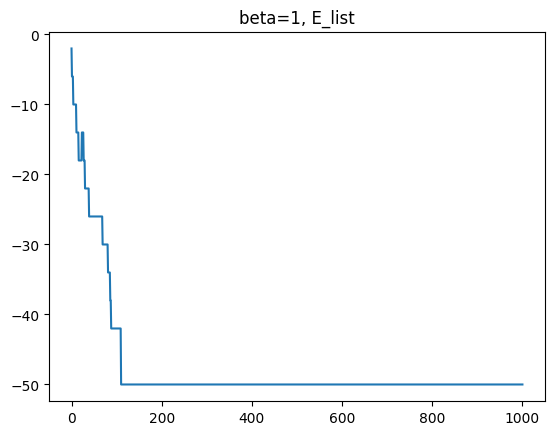

In [9]:
plt.plot(E_list) #베타가 1일때, 에너지가 작아지는 방향으로 행렬이 선택된다.
plt.title('beta=1, E_list')

Text(0.5, 1.0, 'beta=1, m_list')

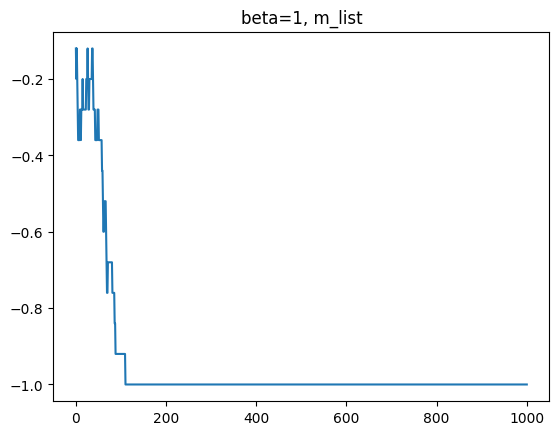

In [10]:
plt.plot(m_list) #행렬의 요소들이 모두 1로 채워지거나 -1로 채워지게 된다.
plt.title('beta=1, m_list')

In [11]:
# 채워진 요소들 확인
S_list[-1] #1 또는 -1로 모두 같아진다

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

# 함수화

In [12]:
# 함수화
def spin_E_change(beta,L, t=1000):
  random_arr = np.random.randn(L*L)
  S = random_arr/abs(random_arr)

  E_S = energy(S)
  m = np.sum(S)/len(S)

  E_list=[E_S]
  m_list=[m]
  S_list=[S]

  print('first E:',E_S,', first m:',m)

  for t in range(t):
    U = S.copy()
    number = np.random.choice(len(U))
    U[number] *= -1

    E_U = energy(U)

    if E_S > E_U:
      accept_S_to_U = 1
    else:
      accept_S_to_U = np.exp(beta*(E_S-E_U))

    if np.random.random() < accept_S_to_U:
      S = U

    E_S = energy(S)
    m = np.sum(S)/len(S)

    E_list.append(E_S)
    m_list.append(m)
    S_list.append(S)

    if t%100 ==0:
      print('now E:',E_S,', m:',m)
  return E_list, m_list, S_list

# beta 0,1 비교

first E: 6.0 , first m: 0.04
now E: 2.0 , m: 0.12
now E: 6.0 , m: 0.12
now E: -10.0 , m: -0.04
now E: -10.0 , m: 0.12
now E: -6.0 , m: 0.44
now E: -10.0 , m: 0.28
now E: -6.0 , m: -0.04
now E: -2.0 , m: 0.12
now E: -6.0 , m: -0.04
now E: -10.0 , m: 0.12


Text(0.5, 1.0, 'beta=0, m_list')

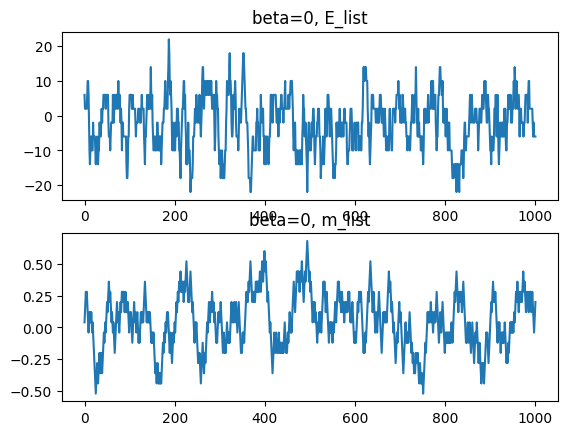

In [14]:
#beta가 0일 때
beta, L = 0, 5
E_list, m_list, S_list = spin_E_change(beta,L)

plt.subplot(211)
plt.plot(E_list)
plt.title('beta=0, E_list')

plt.subplot(212)
plt.plot(m_list)
plt.title('beta=0, m_list')

first E: -14.0 , first m: 0.28
now E: -14.0 , m: 0.2
now E: -30.0 , m: -0.6
now E: -50.0 , m: -1.0
now E: -50.0 , m: -1.0
now E: -50.0 , m: -1.0
now E: -50.0 , m: -1.0
now E: -50.0 , m: -1.0
now E: -50.0 , m: -1.0
now E: -50.0 , m: -1.0
now E: -50.0 , m: -1.0


Text(0.5, 1.0, 'beta=1, m_list')

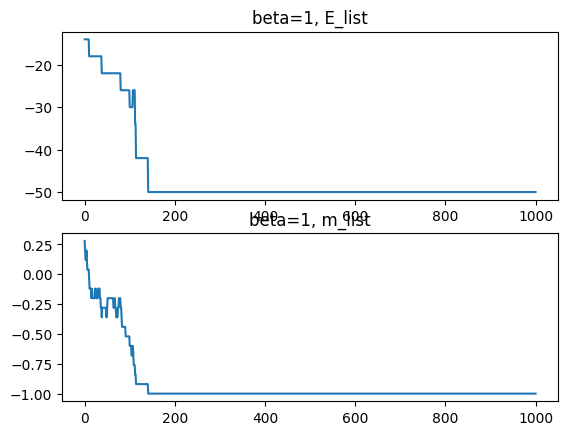

In [15]:
#beta가 1일 때
beta, L = 1, 5
E_list, m_list, S_list = spin_E_change(beta,L)

plt.subplot(211)
plt.plot(E_list)
plt.title('beta=1, E_list')

plt.subplot(212)
plt.plot(m_list)
plt.title('beta=1, m_list')

In [ ]:
# 베타가 0일때는 에너지가 작아지지 않지만(최적화),
# 베타가 1일때, 에너지가 0으로 수렴하는 것을 볼 수 있다.